# Sentdex: Neural Networks and Deep Learning 5: CNN Introduction


* A CNN can accept 2D/3D inputs and not just flattened matrices.
* For an image of 64x64 pixels. A CNN takes a window of for example of 4x4 pixels, it is also called a kernel.
* The window/kernel looks for features(which are just numbers in the end).
* The kernel shifts to the next set of 4x4 pixels until the entire image is covered.
* Bascially condensing that original image.
* This process is called convolution.
* When the convoluted image is created, a pooling algorithm is applied which uses windows/kernels like convolution.
* Most of the time we use max_pooling which just take the max value inside the pooling window.
* What is CNN is doing is drastically simplifying the image and look for features.
* A CNN has multiple layers. 
* The first convolutional layer finds very basic features like an edge/corner/cruve             because the input is just a small collection of pixels or a small window.
* The subsequent layers can find more complicated features                as the input is a collection/condensation of basic features of the first/previous convoluted layers. 

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True 

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|▍                                                                             | 66/12501 [00:00<00:18, 657.98it/s]

PetImages/Cat


  1%|▍                                                                             | 69/12501 [00:00<00:18, 687.88it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:15<00:00, 809.49it/s]
C:\Users\aseem\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [3]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [4]:
print(len(training_data))

24946


In [5]:
print(training_data[1])

[array([[ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  8,  5, ..., 43, 56,  4],
        [ 2, 36, 38, ..., 54, 67,  0],
        ...,
        [ 0,  1,  1, ...,  0,  0,  0],
        [ 0,  0,  1, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8) array([0., 1.])]


<function matplotlib.pyplot.show(close=None, block=None)>

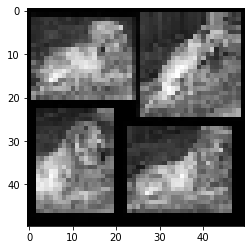

In [11]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show

In [14]:
training_data[1][1]

array([0., 1.])